# 📌 Project Introduction  

## Liver Disease Prediction using Machine Learning  

Liver diseases are among the major public health concerns, where early diagnosis plays a crucial role in effective treatment and increasing patients' life expectancy. One of the main challenges in modern medicine is leveraging clinical data and building intelligent models to assist physicians in decision-making.  

In this project, we use the *Indian Liver Patient Dataset (ILPD)*, which includes various clinical features such as age, gender, blood biochemistry test results, and other indicators related to liver function. The main objectives of this project are to:  

- Predict the likelihood of a patient having liver disease  
- Analyze the most influential features contributing to the prediction  
- Provide a reproducible framework for further research  

By applying this dataset to different machine learning algorithms, we aim to develop a reliable and efficient model for liver disease prediction, which could potentially serve as a decision-support tool in healthcare applications.

## 📚 Importing Libraries  

In this section, we import the essential Python libraries required for:  

- *Data manipulation & analysis* → pandas, numpy  
- *Data visualization* → matplotlib, seaborn  
- *Machine learning models & evaluation* → scikit-learn  

These libraries provide the foundation for data preprocessing, exploratory data analysis (EDA), visualization, and building machine learning models.

In [5]:
# Data manipulation & analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning models & evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

# To ignore warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

## 📂 Loading the Dataset  

In this step, we load the *Indian Liver Patient Dataset (ILPD)* into a pandas DataFrame.  
This allows us to explore the structure of the dataset and perform initial checks such as:  

- Displaying the first few rows using head()  
- Verifying the shape (rows × columns)  
- Getting a quick overview of the features available for analysis

In [6]:
df = pd.read_csv("Indian Liver Patient Dataset (ILPD).csv")
df.head()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


## 🧾 Dataset Structure Overview  

To better understand the dataset, we use the info() method:  

- Displays the number of rows and columns  
- Shows each feature’s data type (numeric, object, etc.)  
- Indicates the count of non-null (non-missing) values per column  

This step helps identify potential *data quality issues* such as missing values or incorrect data types that may need preprocessing.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               583 non-null    int64  
 1   gender            583 non-null    object 
 2   tot_bilirubin     583 non-null    float64
 3   direct_bilirubin  583 non-null    float64
 4   tot_proteins      583 non-null    int64  
 5   albumin           583 non-null    int64  
 6   ag_ratio          583 non-null    int64  
 7   sgpt              583 non-null    float64
 8   sgot              583 non-null    float64
 9   alkphos           579 non-null    float64
 10  is_patient        583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


## 📏 Dataset Dimensions  

To understand the overall size of the dataset, we use the shape attribute:  

- Returns a tuple in the format *(rows, columns)*  
- Helps us quickly identify how many patient records (rows) and features (columns) are available  
- Useful for confirming successful data loading and comparing dataset size before/after preprocessing steps

In [8]:
df.shape

(583, 11)

## 📊 Descriptive Statistics  

To gain an initial statistical understanding of the dataset, we use the describe() method:  

- Provides summary statistics for numerical features  
- Includes metrics such as *count, mean, standard deviation, min, max, and quartiles (25%, 50%, 75%)*  
- Helps detect potential *outliers*, skewed distributions, or unusual values  
- A critical step before applying data preprocessing and machine learning models

In [9]:
df.describe()

,age,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


## 🔍 Missing Values Check  

Before building any machine learning model, it is essential to check for *missing values* in the dataset.  

We use df.isnull().sum() to:  
- Count the number of missing (null) entries in each column  
- Identify which features require data cleaning or imputation  
- Ensure data quality and reliability before further preprocessing

In [10]:
df.isnull().sum()

age                 0
gender              0
tot_bilirubin       0
direct_bilirubin    0
tot_proteins        0
albumin             0
ag_ratio            0
sgpt                0
sgot                0
alkphos             4
is_patient          0
dtype: int64

## 🛠 Handling Missing Values  

The dataset contains a few missing values in the **alkphos** (Alkaline Phosphotase) feature.  
Since this feature is *numerical, we handle the missing values using **mean imputation*:  

- Calculate the mean of the alkphos column  
- Replace all missing entries with this mean value  
- Ensures consistency and prevents data loss without introducing significant bias

In [11]:
#filling the missing values with average of numbers 
df['alkphos'] = df['alkphos'].fillna(df['alkphos'].mean())

#rechecking for missing values 
df.isnull().sum()

age                 0
gender              0
tot_bilirubin       0
direct_bilirubin    0
tot_proteins        0
albumin             0
ag_ratio            0
sgpt                0
sgot                0
alkphos             0
is_patient          0
dtype: int64

## 🧩 Encoding Categorical Features  

The dataset contains categorical features such as **gender**.  
Machine learning models require numerical inputs, so we convert categorical variables into numeric form using *One-Hot Encoding*.  

We use pd.get_dummies() with the following settings:  
- drop_first=True → avoids the dummy variable trap by dropping the first category  
- dtype=int → ensures the encoded values are integers (0 or 1)

In [12]:
#categorical encoding 
df = pd.get_dummies(df, drop_first= True, dtype= int)

#display the first five rows after encoding
df.head()

,age,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient,gender_Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1,1


## 🔗 Correlation Analysis  

Before training the model, it is useful to explore the *correlation matrix* of the dataset.  

- Shows the strength and direction of linear relationships between numerical features  
- Helps identify highly correlated variables (possible multicollinearity)  
- Allows us to check how features relate to the target variable  

We visualize the correlations using a *heatmap* for better interpretability.

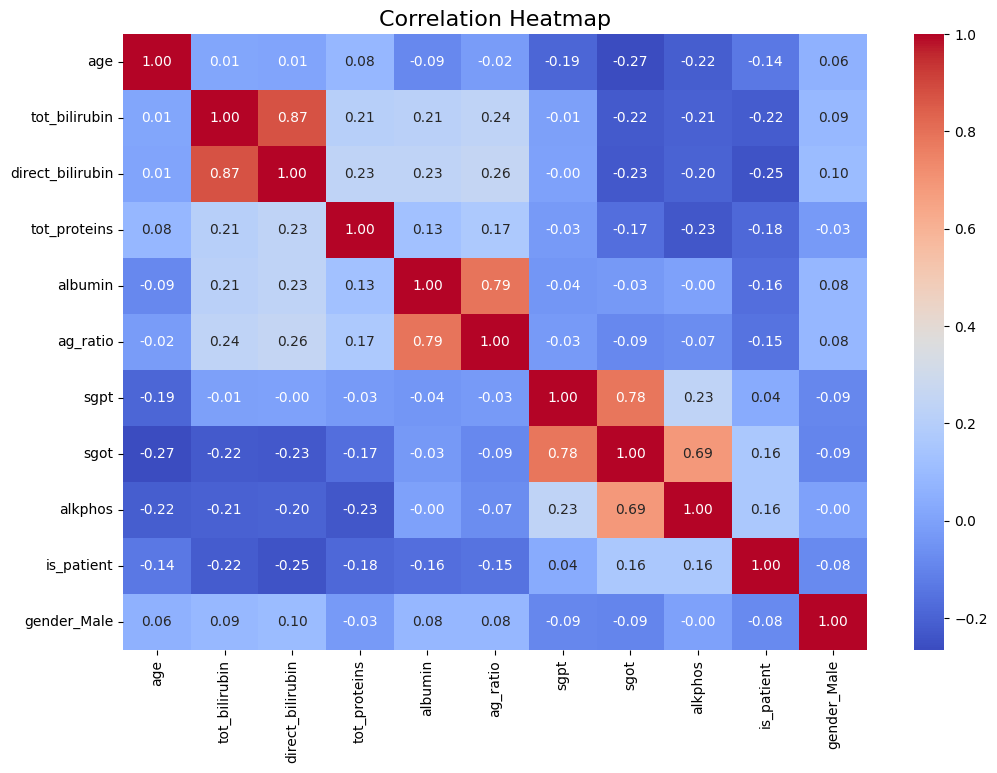

In [13]:
# Compute correlation matrix
corr_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

plt.title("Correlation Heatmap", fontsize=16)
plt.show()

## 🎯 Defining Features (X) and Target (y)  

To train a machine learning model, we need to separate:  

- *Features (X):* All independent variables that will be used for prediction  
- *Target (y):* The dependent variable (in this dataset → whether the patient has liver disease or not)  

This step ensures a clear distinction between input data and the prediction label.

In [14]:
x = df.drop('is_patient', axis=1)
y = df['is_patient']

## 🧪 Train-Test Split  

To properly evaluate our model, we split the dataset into *training* and *testing* sets:  

- *Training set (e.g., 80%)* → used to train the machine learning model  
- *Testing set (e.g., 20%)* → used to evaluate model performance on unseen data  

This step ensures that the model is not just memorizing the training data but can also generalize well to new, unseen cases.  

We use train_test_split from scikit-learn to perform the split.

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

## ⚖ Feature Scaling  

Many machine learning algorithms are sensitive to the *scale of features*.  
Since our dataset contains variables with different ranges (e.g., age, enzymes, proteins),  
we apply *Standardization* using StandardScaler from scikit-learn.  

Standardization transforms the features such that:  
- Mean = 0  
- Standard deviation = 1  

This ensures that all features contribute equally to the model and improves convergence for algorithms like Logistic Regression and SVM.

In [17]:
scaler = StandardScaler()

x_train_scaler = scaler.fit_transform(x_train)

x_test_scaled = scaler.transform(x_test)

## 🤖 Training Logistic Regression Model  

With the data preprocessed and scaled, we now train a *Logistic Regression* model:  

- Fit the model on the *training set*  
- Use the trained model to make predictions on the *test set*  
- Store the predictions for evaluation in the next step

In [20]:
log_regression = LogisticRegression()

log_regression.fit(x_train_scaler, y_train)

y_pred = log_regression.predict(x_test_scaled)

## 📊 Model Evaluation  

To assess the performance of the Logistic Regression model, we use the following metrics:  

- *Accuracy* → overall correctness of predictions  
- *Classification Report* → includes Precision, Recall, and F1-score for each class  
- *Confusion Matrix* → provides detailed insight into correctly and incorrectly classified cases  

These metrics help us understand both the general performance and where the model makes mistakes.

In [21]:
# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7606837606837606

Classification Report:

              precision    recall  f1-score   support

           1       0.79      0.92      0.85        87
           2       0.56      0.30      0.39        30

    accuracy                           0.76       117
   macro avg       0.68      0.61      0.62       117
weighted avg       0.73      0.76      0.73       117


Confusion Matrix:

[[80  7]
 [21  9]]


## 🖼 Visualizing the Confusion Matrix  

While the numeric confusion matrix provides exact values, a *heatmap visualization* makes it easier to interpret:  

- *True Positives (TP):* correctly predicted positive cases  
- *True Negatives (TN):* correctly predicted negative cases  
- *False Positives (FP):* incorrectly predicted as positive  
- *False Negatives (FN):* incorrectly predicted as negative  

This visualization highlights model strengths and weaknesses in classification.

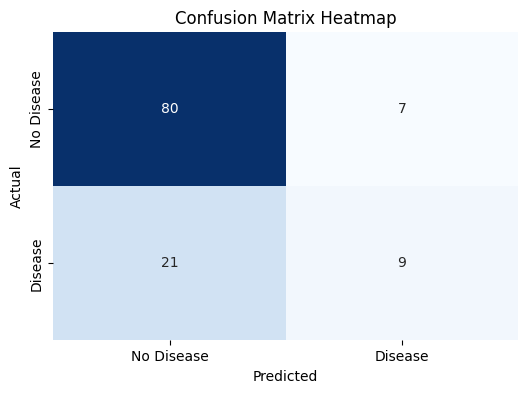

In [22]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["No Disease", "Disease"],
            yticklabels=["No Disease", "Disease"])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()

## 🔄 Cross-Validation for Model Validation  

To obtain a more reliable estimate of model performance,  
we use *k-Fold Cross-Validation* (e.g., k=5):  

- The dataset is split into k equal folds  
- The model is trained on k-1 folds and tested on the remaining fold  
- This process repeats k times, each time with a different test fold  
- Final performance is the *average score across all folds*  

This method reduces bias from a single train-test split and ensures the model generalizes well.

In [24]:
# Initialize Logistic Regression model
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# Perform 5-fold cross-validation using accuracy as the metric
cv_scores = cross_val_score(log_reg, x, y, cv=5, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.7008547  0.72649573 0.70940171 0.70689655 0.72413793]
Mean Accuracy: 0.7135573239021514


## ✅ Conclusion  

In this project, we built a *machine learning model* to predict liver disease using the  
*Indian Liver Patient Dataset (ILPD)*.  
Key steps included:  

- Handling missing values with mean imputation  
- Encoding categorical variables (e.g., gender)  
- Splitting data into training and test sets  
- Scaling features for better model performance  
- Training and evaluating a *Logistic Regression* model  

The Logistic Regression model achieved an accuracy of ~76% on the test set and ~71% average accuracy under cross-validation.  
The model showed strong performance in detecting patients with liver disease but struggled to correctly classify healthy individuals.  

---

## 🔮 Future Work  

To further improve the performance and reliability of the model, the following steps are recommended:  

1. *Data Balancing:*  
   Apply techniques like *SMOTE (Synthetic Minority Oversampling Technique)* or undersampling to address class imbalance.  

2. *Model Improvements:*  
   Experiment with more advanced algorithms such as *Random Forest, **XGBoost, or **LightGBM*, which may handle imbalanced data better.  

3. *Hyperparameter Tuning:*  
   Use *GridSearchCV* or *RandomizedSearchCV* to optimize model parameters for better performance.  

4. *Feature Engineering:*  
   Explore new features or transformations (ratios, non-linear terms) that may capture hidden patterns in the dataset.  

5. *Larger & Cleaner Dataset:*  
   Gathering more patient data and ensuring higher data quality would help reduce noise and improve generalization.  

---

## ⚠ Data Limitations  

- *Imbalanced Classes:*  
  The dataset contains significantly more patients with liver disease than healthy individuals.  
  This imbalance leads the model to bias predictions towards the majority class.  

- *Small Dataset Size:*  
  With ~580 records, the dataset is relatively small for training robust models.  
  This limits the model’s ability to capture complex patterns.  

- *Noise in Medical Data:*  
  Laboratory results and clinical data often include measurement errors or natural variability,  
  which can reduce the model’s predictive power.  

Despite these challenges, this project demonstrates the feasibility of using machine learning for liver disease prediction and provides a solid baseline for future improvements.